<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [4]:
data = pd.read_csv('house_prices.csv')
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


Dataset Overview:
Derived from the diverse offerings of Coursera's weekly courses, the dataset "house_prices.csv" boasts 1380 entries, each a snapshot of the intricate tapestry of residential features. Spanning architecture, condition, amenities, location, and miscellaneous details, it provides a holistic view conducive to nuanced regression analyses.

At its heart lies the Sale Price, propelled by a constellation of predictors:

Overall Quality: A beacon of discernment, shaping market perception.
Living Area (GrLivArea): The spatial canvas upon which value is painted.
Year Built: A marker of temporal relevance, influencing desirability.
Basement Square Footage (TotalBsmntSF): An extension of living space, amplifying value.
Full Bathrooms: An indispensable facet of comfort, influencing pricing dynamics.
Garage Capacity (GarageCars): A reflection of utility and convenience, driving valuations.
Lot Area: A canvas for outdoor living, often translating size to significance in pricing.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
data["total_bedrooms"].isnull().value_counts()


total_bedrooms
False    20433
True       207
Name: count, dtype: int64

In [7]:
average_bedrooms = data["total_bedrooms"].mean()
average_bedrooms

537.8705525375618

In [8]:
data["total_bedrooms"] = data["total_bedrooms"].fillna(average_bedrooms)

In [9]:
data["total_bedrooms"].isnull().value_counts()

total_bedrooms
False    20640
Name: count, dtype: int64

In [10]:
data[data["total_bedrooms"] == average_bedrooms]["total_bedrooms"]

290      537.870553
341      537.870553
538      537.870553
563      537.870553
696      537.870553
            ...    
20267    537.870553
20268    537.870553
20372    537.870553
20460    537.870553
20484    537.870553
Name: total_bedrooms, Length: 207, dtype: float64

In [11]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [12]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
# encode categories as <1h ocean = 0, inland = 1, near ocean = 2, near bay = 3, island = 4
data["ocean_proximity"] = data["ocean_proximity"].map({"<1H OCEAN":0, "INLAND":1, "NEAR OCEAN":2, "NEAR BAY":3, "ISLAND":4})

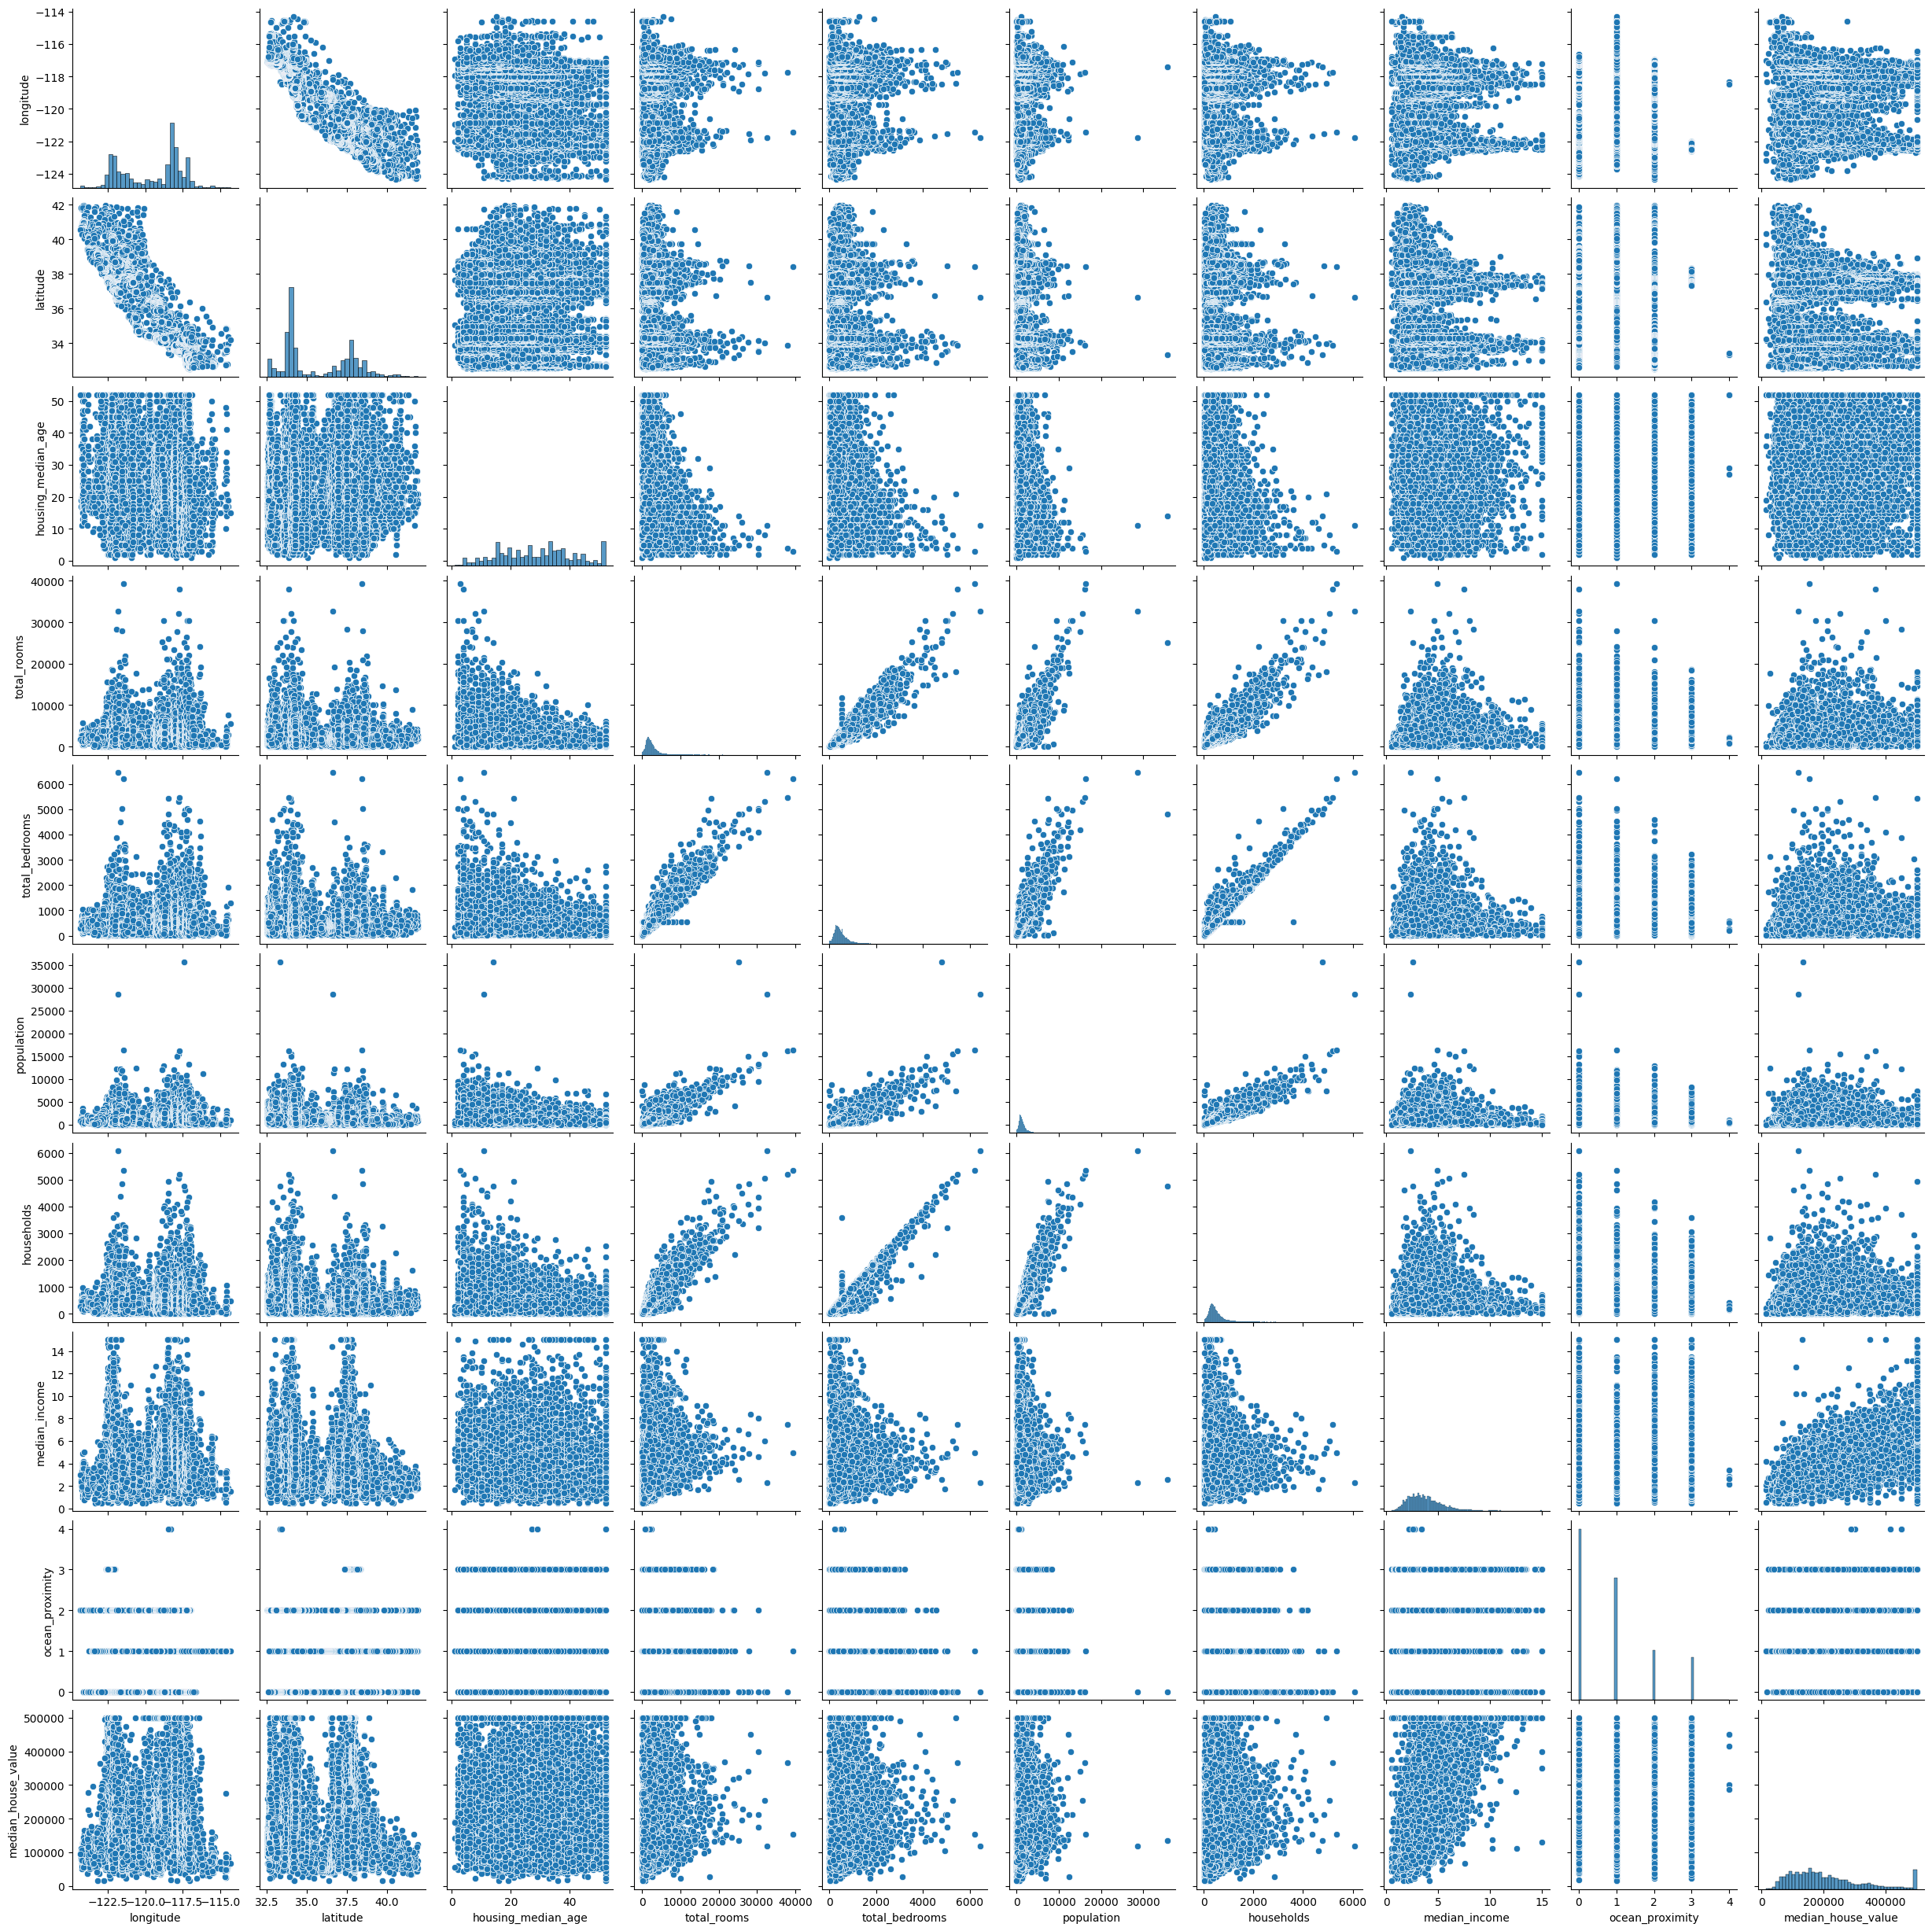

In [14]:
sns.pairplot(data)

In [15]:
x = data.iloc[:, 0:-1]
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1


In [16]:
y = pd.DataFrame(data.iloc[:, -1])
y

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


<Axes: >

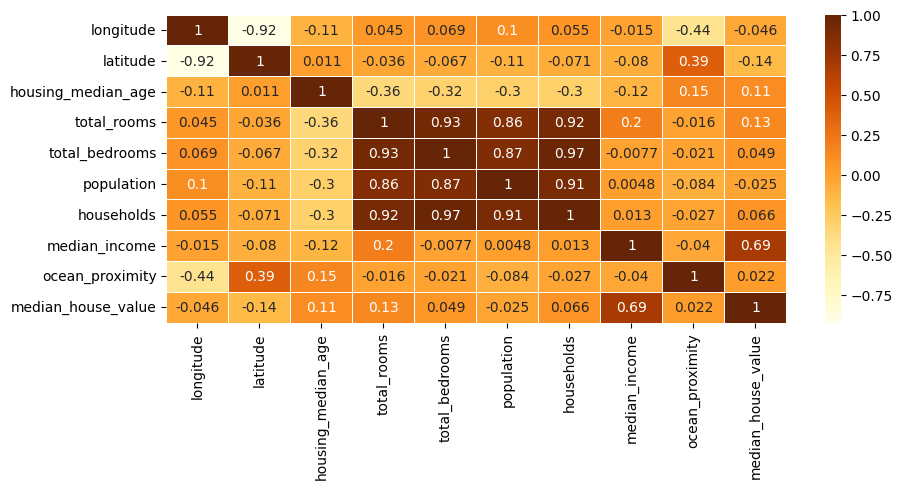

In [17]:
corr = data.corr(method='pearson')
fig = plt.subplots(figsize = (10, 4))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlOrBr',
            annot=True,
            linewidth=0.5)

# 2. Objectives


Main Objective and Methodological Approach:

Our primary goal is to craft a precise linear regression model capable of forecasting house sale prices, harnessing the wealth of features within our dataset. This endeavor isn't just about prediction; it's a nuanced exploration of how various features influence housing market dynamics.

Data Exploration and Preprocessing:
Our journey begins with a thorough exploration of the dataset, addressing missing values, encoding categorical variables, and scaling numerical features to prepare our data for modeling.

Feature Engineering:
Armed with insights, we engineer features, crafting transformations and novel variables to enhance our predictive capabilities.

Model Selection and Training:
We delve into model selection, testing a variety of regression algorithms and fine-tuning hyperparameters to optimize predictive performance.

Evaluation and Interpretation:
Models undergo rigorous evaluation using metrics like MSE and RMSE. We then interpret model predictions, identifying influential features through techniques such as feature importance analysis.

Iterative Refinement and Validation:
Through iterative refinement, we optimize models, ensuring robustness via cross-validation to uphold performance across diverse scenarios.

This strategic fusion of data exploration, feature engineering, model refinement, and interpretive analysis promises not only accurate predictions but also deep insights into the intricate dynamics of housing market pricing.

# 3. Linear Regression Models


In [18]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.20)

In [19]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(4128, 9)
(4128, 1)
(16512, 9)
(16512, 1)


In [20]:
scaler = StandardScaler()

In [21]:
# standardize only x variates using training mean and median to avoid corruption by test data

scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
print(x_train_std.shape)
print(x_test_std.shape)

(16512, 9)
(4128, 9)


In [22]:
# fit linear regression model using standardized x_train

housing_price_predictor = LinearRegression()
housing_price_predictor.fit(x_train_std, y_train)

LinearRegression()

In [23]:
y_predict = housing_price_predictor.predict(x_test_std)

In [24]:
y_predict = pd.DataFrame(y_predict).rename(columns={0:"predicted house value"})
y_predict

,predicted house value
0,121799.639246
1,179282.278984
2,152464.885980
3,269131.304995
4,193583.300222
...,...
4123,-37653.368633
4124,55327.839542
4125,199054.840146
4126,372650.740380


In [25]:
y_test = y_test.reset_index().drop(columns="index")
y_test

,median_house_value
0,177500
1,162500
2,258300
3,239600
4,118800
...,...
4123,73500
4124,106300
4125,154200
4126,422500


In [26]:
y_predict = pd.concat([y_predict, y_test], axis=1)
y_predict

,predicted house value,median_house_value
0,121799.639246,177500
1,179282.278984,162500
2,152464.885980,258300
3,269131.304995,239600
4,193583.300222,118800
...,...,...
4123,-37653.368633,73500
4124,55327.839542,106300
4125,199054.840146,154200
4126,372650.740380,422500


In [27]:
y_predict["predicted house value"] = y_predict["predicted house value"].apply(round)
y_predict

,predicted house value,median_house_value
0,121800,177500
1,179282,162500
2,152465,258300
3,269131,239600
4,193583,118800
...,...,...
4123,-37653,73500
4124,55328,106300
4125,199055,154200
4126,372651,422500


In [28]:
x_train = x_train["median_income"]
x_test = x_test["median_income"]

In [29]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [30]:
housing_price_predictor.fit(x_train, y_train)

LinearRegression()

In [31]:
y_predict = housing_price_predictor.predict(x_test)
y_predict = pd.DataFrame(y_predict).rename(columns={0:"predicted house value"})
y_predict

,predicted house value
0,84191.934484
1,171547.937311
2,88255.970768
3,217203.935935
4,175395.889866
...,...
4123,133878.725741
4124,151643.301523
4125,222975.864768
4126,365196.357431


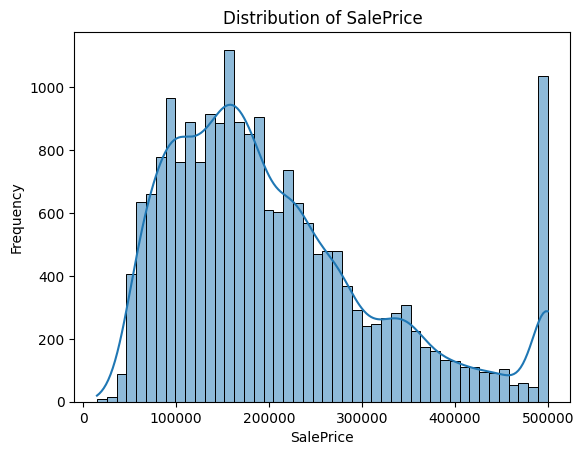

In [32]:
sns.histplot(data['median_house_value'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

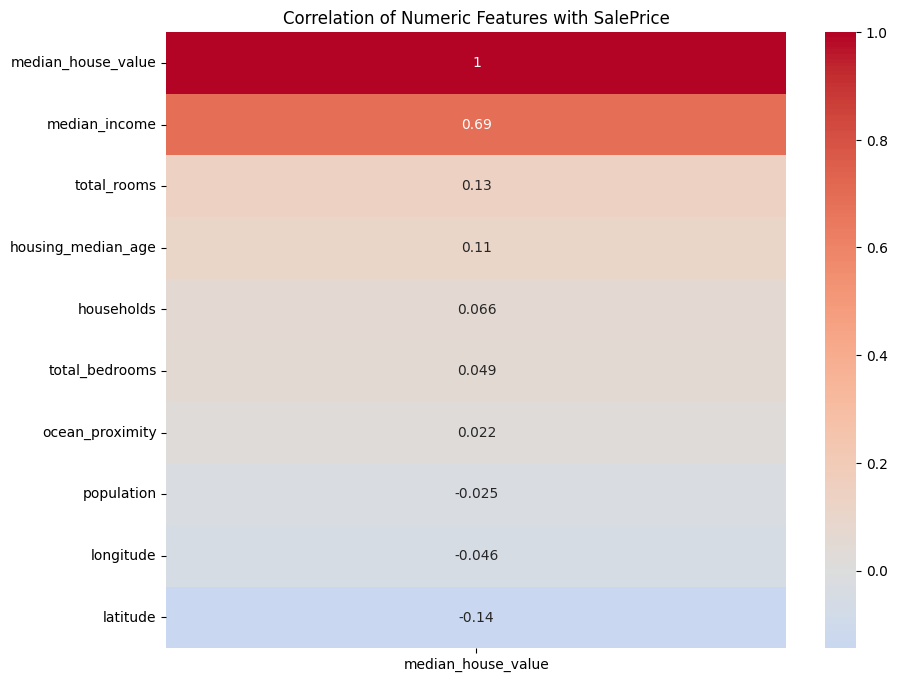

In [33]:
# Select only the numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns only
corr_matrix = numeric_data.corr()

# Generate a heatmap of the correlation with SalePrice
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix[['median_house_value']].sort_values(by='median_house_value', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Numeric Features with SalePrice')
plt.show()

In [34]:
#Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(x_train, y_train)
y_pred_poly = poly_model.predict(x_test)

In [35]:
#Ridge Regression lines

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

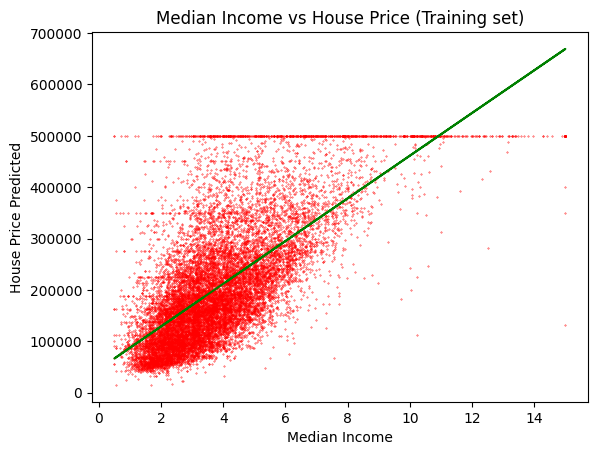

In [36]:
plt.scatter(x_train, y_train, color = "red", s=0.1)
plt.plot(x_train, housing_price_predictor.predict(x_train), color = "green")
plt.title("Median Income vs House Price (Training set)")
plt.xlabel("Median Income")
plt.ylabel("House Price Predicted")
plt.show()

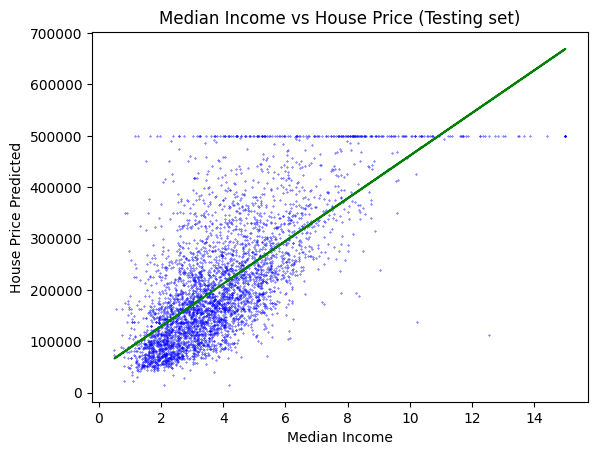

In [37]:
plt.scatter(x_test, y_test, color = "blue", s=0.1)
plt.plot(x_train, housing_price_predictor.predict(x_train), color = "green")
plt.title("Median Income vs House Price (Testing set)")
plt.xlabel("Median Income")
plt.ylabel("House Price Predicted")
plt.show()

# 4. Insights and key findings


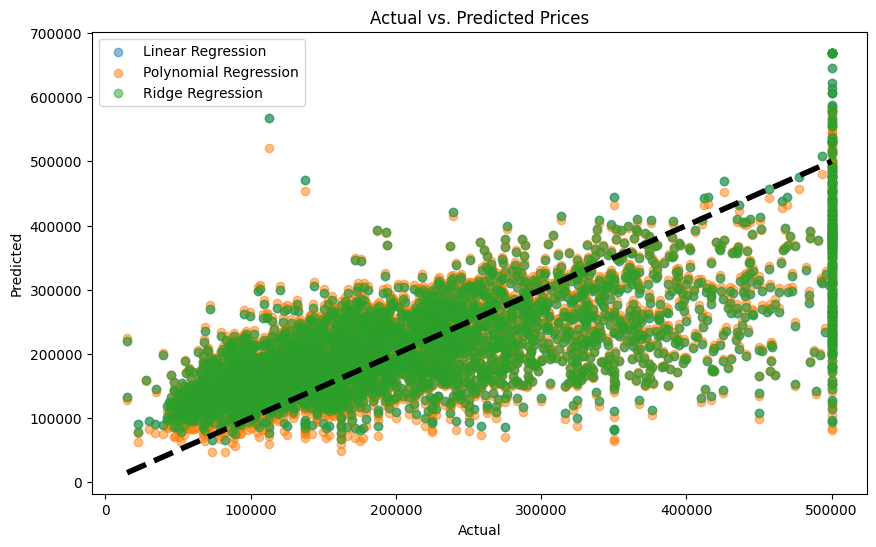

In [38]:
#plot actual vs predict

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_poly, label='Polynomial Regression', alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()


While linear regression serves as a valuable tool for prediction, its effectiveness may diminish when dealing with datasets rich in diverse features. However, by complementing it with techniques like decision trees and polynomial fitting, we enhance predictive accuracy.

Decision trees offer a flexible approach to modeling nonlinear relationships and complex interactions within the data. Their intuitive nature also aids in understanding the underlying decision-making process.

Polynomial fitting allows us to capture nonlinear relationships between features and target variables. By accommodating curvature and nonlinearity, it enhances predictive accuracy and captures intricate patterns.

By integrating these techniques alongside linear regression, we create a hybrid approach that leverages the strengths of each method, resulting in more accurate predictions and deeper insights into our data.

# 5. Next Steps


Continuing our quest to refine predictive accuracy, we'll now introduce additional polynomial features into our dataset. Leveraging the PolynomialFeatures class from sklearn.preprocessing, we'll expand our feature space to capture higher-order interactions and nonlinear relationships that may enhance our model's performance.

To ensure robust testing, we'll employ scaling and regularization techniques. Scaling facilitates consistency across varying feature scales, while regularization guards against overfitting, promoting model stability and generalization.

This strategic augmentation and refinement process promises to deepen our understanding of the data landscape and bolster predictive prowess, equipping us with sharper insights and more reliable predictions.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
